In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
CARDS = [('9', 'd'), ('10', 'd'), ('J', 'd'), ('Q', 'd'), ('K', 'd'), ('A', 'd'),
         ('9', 'h'), ('10', 'h'), ('J', 'h'), ('Q', 'h'), ('K', 'h'), ('A', 'h'),
         ('9', 's'), ('10', 's'), ('J', 's'), ('Q', 's'), ('K', 's'), ('A', 's'),
         ('9', 'c'), ('10', 'c'), ('J', 'c'), ('Q', 'c'), ('K', 'c'), ('A', 'c')]

In [4]:
def derive_hand_stats(hand):
    suit_prevalence = {'d' : 0, 'h' : 0, 's' : 0, 'c' : 0}
    num_jacks = 0
    for card in hand:
        suit_prevalence[card[1]] += 1
        if card[0] == 'J':
            num_jacks += 1
    return max(suit_prevalence.values()), num_jacks

def deal_cards():
    hands = CARDS
    random.shuffle(hands)

    hand_lst = [hands[x:x+8] for x in range(0, len(hands), 8)]

    max_trumps = 0
    num_max_suits = []
    for hand in hand_lst:
        max_suit, num_jacks = derive_hand_stats(hand)
        trumps = max_suit + num_jacks
        if trumps > max_trumps:
            max_trumps = trumps
        num_max_suits.append(max_suit)
    return max_trumps, num_max_suits

def monte_carlo(iterations):
    max_trumps_arr = []
    num_max_suit_arr = []
    for _ in range(iterations):
        max_trumps, num_max_suits = deal_cards()
        max_trumps_arr += [max_trumps]
        num_max_suit_arr += num_max_suits
    return max_trumps_arr, num_max_suit_arr

In [5]:
max_trumps_arr, num_max_suit_arr = monte_carlo(100000)

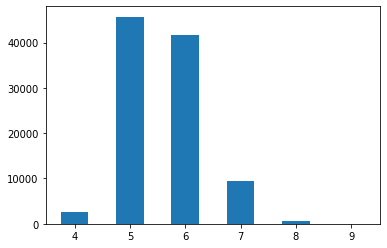

In [12]:
data = range(11)
data = np.array(max_trumps_arr)

d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.5)
plt.show()

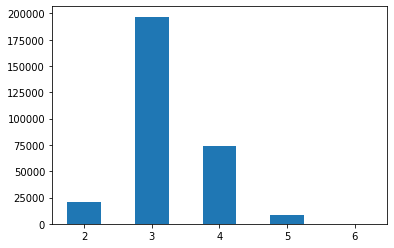

In [13]:
data2 = range(11)
data2 = np.array(num_max_suit_arr)

d2 = np.diff(np.unique(data2)).min()
left_of_first_bin2 = data2.min() - float(d2)/2
right_of_last_bin2 = data2.max() + float(d2)/2
plt.hist(data2, np.arange(left_of_first_bin2, right_of_last_bin2 + d2, d2), rwidth=0.5)
plt.show()

In [15]:
average_trumps = np.mean(num_max_suit_arr) + 4/3
print(average_trumps)

4.56714
